<a href="https://colab.research.google.com/github/robd123/AML/blob/main/CV/digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from time import time

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from datetime import datetime

In [2]:
which = 3
out_file = 'numbers'
print( 'input data: ', out_file )
class_names = [ '0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
channels = 1  #gray=1; rgb=3

input data:  numbers
11493376/11490434 [==============================] - 0s 0us/step


first 25 training images (as gray data)


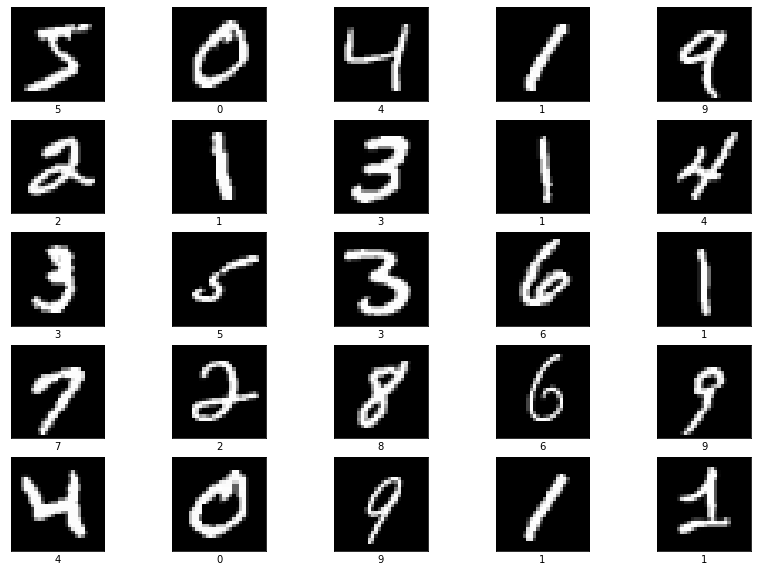

In [3]:
print( 'first 25 training images (as gray data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as gray data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()

[  0   0   0   0   0   0 164 253 253 253 253 253 253 255 253 253 253 253
 253 253  99   0   0   0   0   0   0   0]


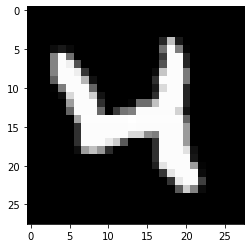

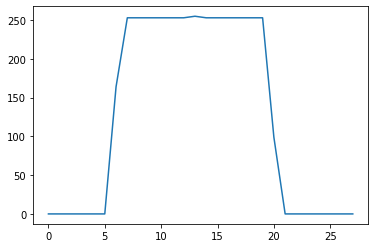

[  0   0   0   0   0   0   0   0   0   0   0   0 169 254 253 169   0   0
   0   0   0   0   0   0   0   0   0   0]


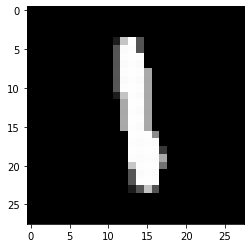

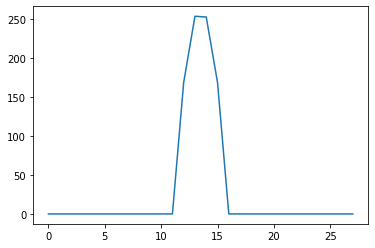

In [4]:
if channels == 1:  # 1 == gray
    i = 20  #image 20
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

    i = 200  #image 200
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

first 25 training images (as binary data)


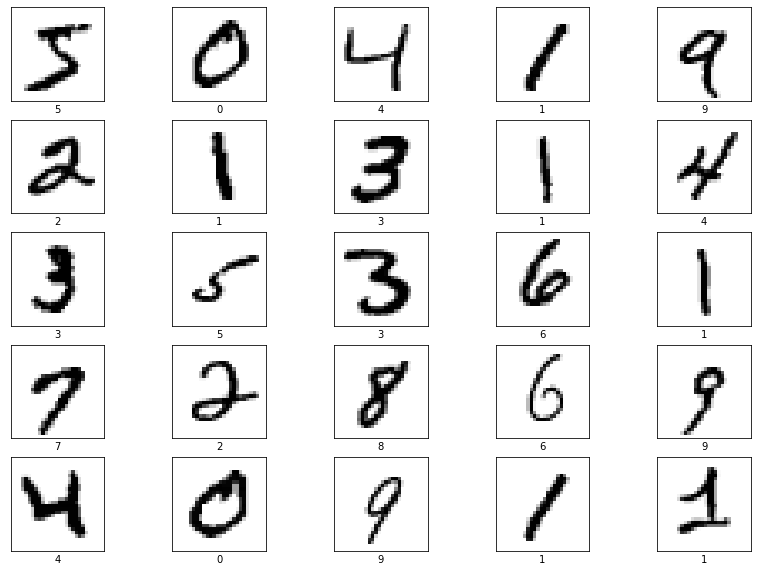

In [5]:
#show first 25 training images (as binary data)
print( 'first 25 training images (as binary data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as binary data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()


**TODO #1 - Use a Randomized 80/20 Split for Training and Test Data**

In [6]:
X = np.concatenate((train_images, test_images), axis = 0)
Y = np.concatenate((train_labels, test_labels), axis = 0)

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

#Keep these since they are used later.  Reassign them to the new randomly split data
train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

print( "# of training images and their size:", train_images.shape       )
print( "# of training labels and their size:", train_labels.shape, "\n" )

print( "# of testing images and their size:",  test_images.shape        )
print( "# of testing labels and their size:",  test_labels.shape        )

(70000, 28, 28)
(70000,)
# of training images and their size: (56000, 28, 28)
# of training labels and their size: (56000,) 

# of testing images and their size: (14000, 28, 28)
# of testing labels and their size: (14000,)


[1322. 1562. 1383. 1502. 1359. 1260. 1364. 1461. 1336. 1451.]


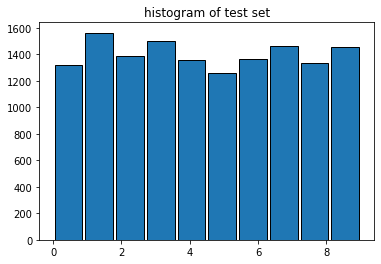

In [7]:
plt.title( 'histogram of test set' )
out = plt.hist( test_labels, ec='black', rwidth=0.9 )
print( out[0] )


[5581 6315 5607 5639 5465 5053 5512 5832 5489 5507]


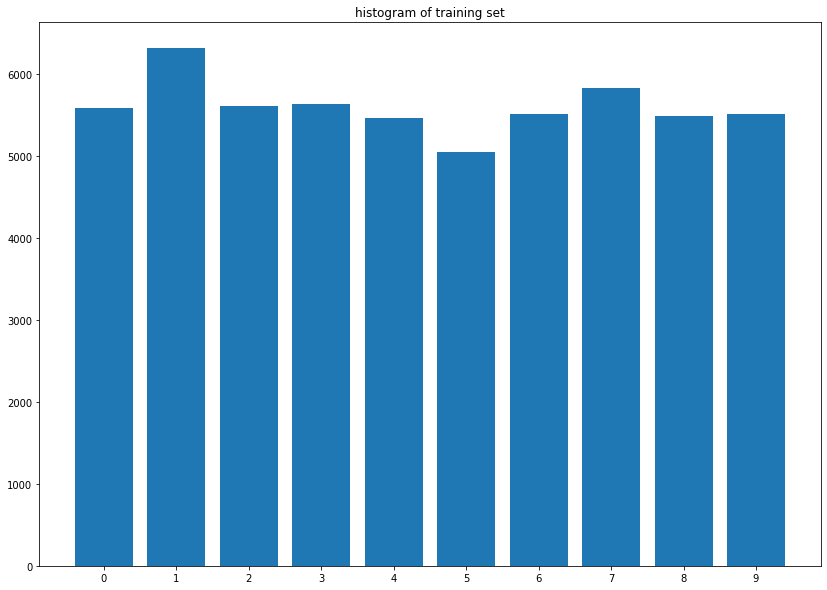

In [8]:
h = np.histogram( train_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of training set' )
plt.bar( class_names, h )
plt.show()

[1322 1562 1383 1502 1359 1260 1364 1461 1336 1451]


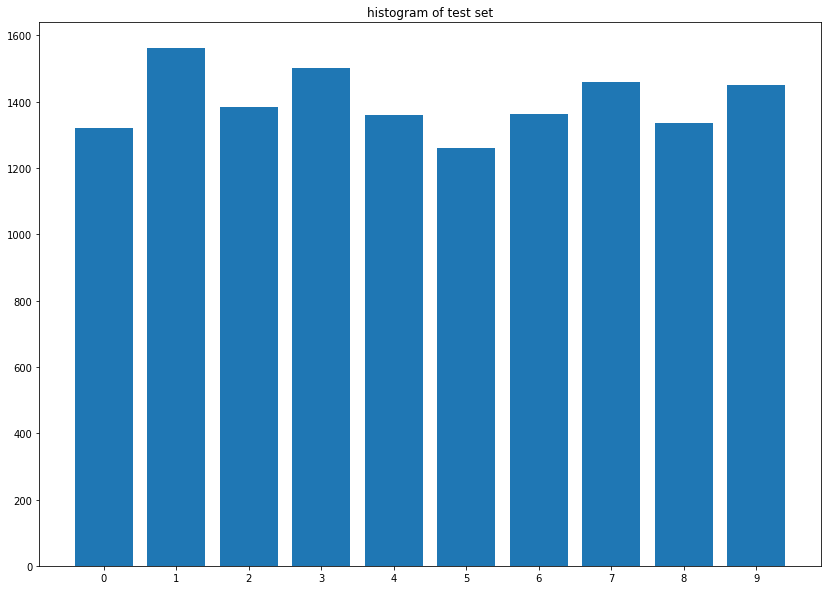

In [9]:
h = np.histogram( test_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of test set' )
plt.bar( class_names, h )
plt.show()


In [10]:
img_rows    = x_train.shape[1]
img_cols    = x_train.shape[2]
input_shape = (img_rows, img_cols, channels)    #channels = 1 for gray (3 for color/rgb)

t1 = np.min( x_train )
t2 = np.min( x_test )
mn = np.min( [t1, t2] )

t1 = np.max( x_train )
t2 = np.max( x_test )
mx = np.min( [t1, t2] )

print( 'rows =', img_rows )
print( 'cols =', img_cols )
print( 'channels =', channels, '\n' )
print( 'min =', mn )
print( 'max =', mx )

rows = 28
cols = 28
channels = 1 

min = 0
max = 255


In [11]:
print( '# of training images: ', len(x_train) )
print( 'shape before: ', x_train.shape )

#prep training images
x_train = x_train.reshape( x_train.shape[0], img_rows, img_cols, channels )
x_train = x_train.astype( 'float32' )

assert mx == 255, "check range of data values"
x_train /= 255.0  #normalize

print( 'shape after: ', x_train.shape )

"""### prep testing"""

print( '# of testing images: ', len(x_test) )
print( 'shape before: ', x_test.shape )


# of training images:  56000
shape before:  (56000, 28, 28)
shape after:  (56000, 28, 28, 1)
# of testing images:  14000
shape before:  (14000, 28, 28)


In [12]:
#prep testing images
x_test = x_test.reshape( x_test.shape[0], img_rows, img_cols, channels )
x_test = x_test.astype( 'float32' )
assert mx == 255, "check range of data values"
x_test /= 255.0  #normalize

In [13]:
print( 'create new model' )
print( 'input shape: ', input_shape )
model = keras.Sequential()
model.add( keras.layers.Flatten( input_shape=input_shape ) )
model.add( keras.layers.Dense( 128,              activation='relu'    ) )
model.add( keras.layers.Dense( len(class_names), activation='softmax' ) )
model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

model.summary()

create new model
input shape:  (28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


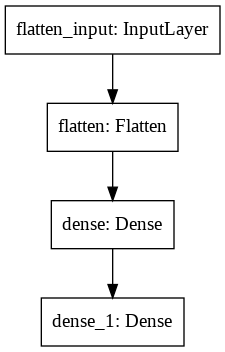

In [14]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )


In [16]:
print( '\ntesting all test images (before any training) ...' )
test_loss, test_acc = model.evaluate( x_test, y_test )
print( "loss=" + str(test_loss) + ", test acc=" + str(test_acc) + "\n" )

# Define the Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime( "%Y%m%d-%H%M%S" )
tensorboard_callback = keras.callbacks.TensorBoard( log_dir=logdir )


testing all test images (before any training) ...
438/438 [==============================] - 1s 2ms/step - loss: 2.4582 - accuracy: 0.0481
loss=2.4581754207611084, test acc=0.04807142913341522



**TODO #2 - Train Model, Use Test Data for Validation**

---
Validation data does not affect the training of the model, it just provides metrics, so the test set can be used for validation.


In [17]:
print( "training ... \n" )
ep = 100
start = time()
h = model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback],  validation_data=(x_test, y_test))
elapsed_training_time = time() - start

training ... 

Epoch 1/100
1750/1750 [==============================] - 5s 2ms/step - loss: 0.2600 - accuracy: 0.9255 - val_loss: 0.1561 - val_accuracy: 0.9550
Epoch 2/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1149 - accuracy: 0.9649 - val_loss: 0.1053 - val_accuracy: 0.9707
Epoch 3/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9766 - val_loss: 0.0941 - val_accuracy: 0.9724
Epoch 4/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.0926 - val_accuracy: 0.9746
Epoch 5/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0444 - accuracy: 0.9863 - val_loss: 0.0935 - val_accuracy: 0.9736
Epoch 6/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0910 - val_accuracy: 0.9737
Epoch 7/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 

In [18]:
model.save('digits_shallow.h5')

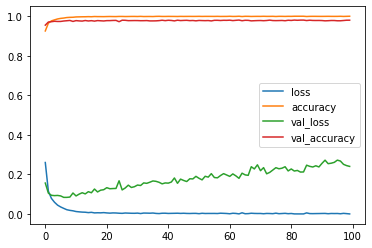

In [19]:
pd.DataFrame(model.history.history).plot()

In [20]:
print(elapsed_training_time)

383.9636993408203


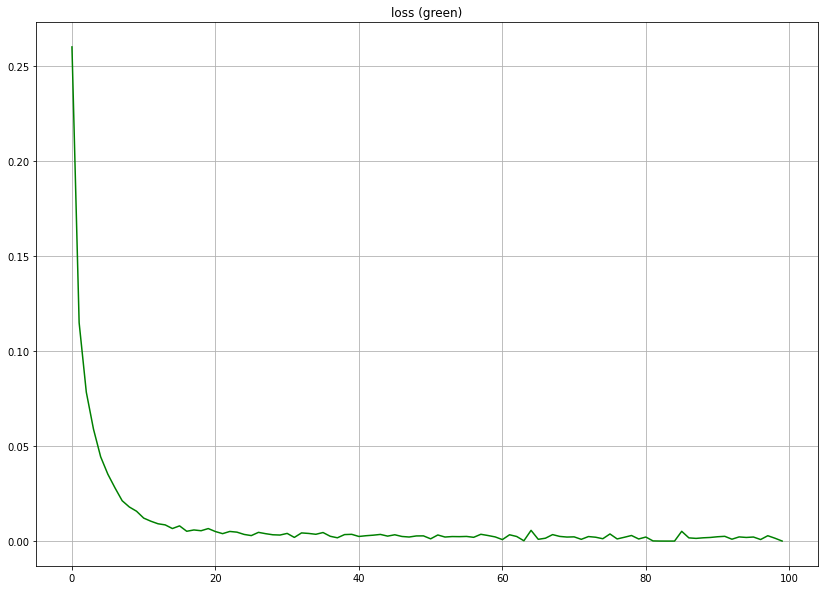

loss: [0.2600098252296448, 0.11487668007612228, 0.07836094498634338, 0.05892326310276985, 0.044363368302583694, 0.03521865978837013, 0.02799210324883461, 0.02123807556927204, 0.01793569326400757, 0.01572144404053688, 0.012097075581550598, 0.010459229350090027, 0.0091105280444026, 0.008525582030415535, 0.006605763919651508, 0.008008806966245174, 0.00516577810049057, 0.005860172677785158, 0.0054530370980501175, 0.006590737029910088, 0.005019992124289274, 0.003917527850717306, 0.005072500556707382, 0.004703234415501356, 0.003508078632876277, 0.002894538687542081, 0.004596667364239693, 0.0038981507532298565, 0.003327850718051195, 0.0031822267919778824, 0.004045031499117613, 0.0019358649151399732, 0.0043022362515330315, 0.004027251154184341, 0.003581675700843334, 0.004503051284700632, 0.002541088731959462, 0.0017390376888215542, 0.003427408169955015, 0.003557892981916666, 0.0024363656993955374, 0.0028290993068367243, 0.003113538958132267, 0.0035103163681924343, 0.002615936566144228, 0.00332

In [21]:
#report and plot loss
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'loss (green)' );       
plt.plot( h.history['loss'],     'g' ); 
plt.show()
print( "loss:", h.history["loss"] )

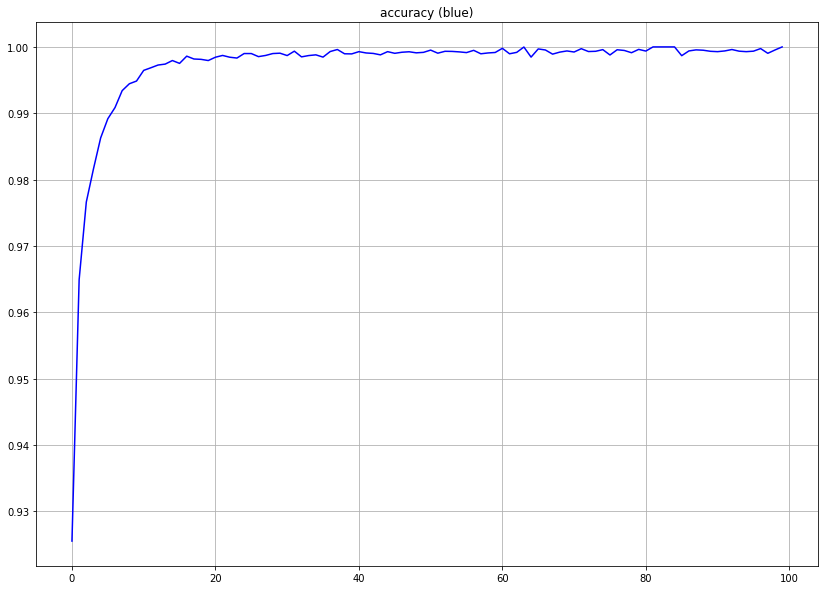

accuracy: [0.9255357384681702, 0.9649106860160828, 0.9766250252723694, 0.9816250205039978, 0.9862856864929199, 0.9891785979270935, 0.9908571243286133, 0.9934107065200806, 0.9944464564323425, 0.994857132434845, 0.9964643120765686, 0.9968571662902832, 0.9972678422927856, 0.9974107146263123, 0.9979464411735535, 0.9975178837776184, 0.9986071586608887, 0.9981785416603088, 0.9981250166893005, 0.9979464411735535, 0.9984464049339294, 0.99871426820755, 0.9984464049339294, 0.9983214139938354, 0.9990000128746033, 0.9990000128746033, 0.998535692691803, 0.99871426820755, 0.9990000128746033, 0.9990535974502563, 0.9986964464187622, 0.9993571639060974, 0.9984999895095825, 0.9986964464187622, 0.9988035559654236, 0.9984642863273621, 0.9993035793304443, 0.9996071457862854, 0.9989643096923828, 0.9989464282989502, 0.9992856979370117, 0.9990893006324768, 0.9990178346633911, 0.9988035559654236, 0.9992856979370117, 0.9990357160568237, 0.9991964101791382, 0.9992678761482239, 0.9991071224212646, 0.9991785883903

In [22]:
#report accuracy
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'accuracy (blue)'   );
plt.plot( h.history['accuracy'], 'b' ); 
plt.show()
print( "accuracy:", h.history["accuracy"] )

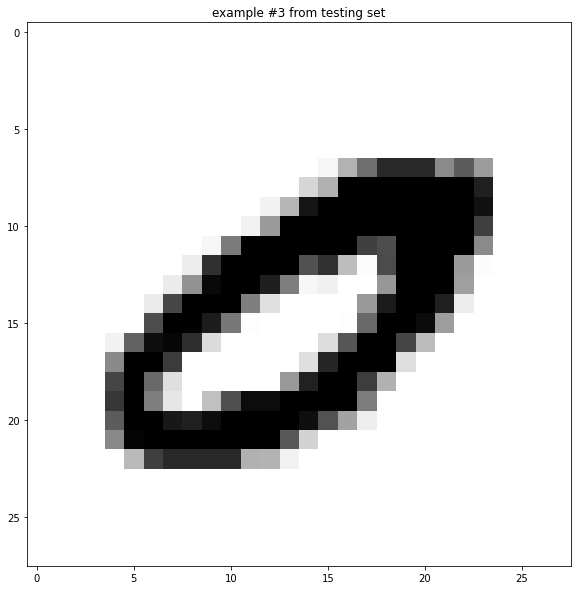

In [23]:
# show a sample test image
plt.figure( figsize=(14,10) )
plt.title( 'example #' + str(which) + ' from testing set' )
plt.imshow( test_images[which], cmap=plt.cm.binary, interpolation='nearest' )
plt.grid( False )
plt.draw()
plt.show()

In [24]:
#show sample prediction
print( 'actual class for test #', which, ':', test_labels[which], class_names[test_labels[which]] )
#get the image from the test dataset
img = x_test[ which ]
#add the image to a batch where it's the only member
img = ( np.expand_dims(img, 0) )
prediction = model.predict( img )
print( 'prediction vector for test image #' + str(which) + ':', prediction[0] )
print( 'subscript of maximal prediction:', np.argmax(prediction[0]), class_names[np.argmax(prediction[0])] )

actual class for test # 3 : 0 0
prediction vector for test image #3: [1.0000000e+00 0.0000000e+00 3.6144976e-25 0.0000000e+00 4.4137424e-36
 3.3766465e-33 5.8524204e-26 6.8202193e-22 3.9520261e-32 9.5241463e-37]
subscript of maximal prediction: 0 0


# First Prediction

first 120 test images (errors in parens)


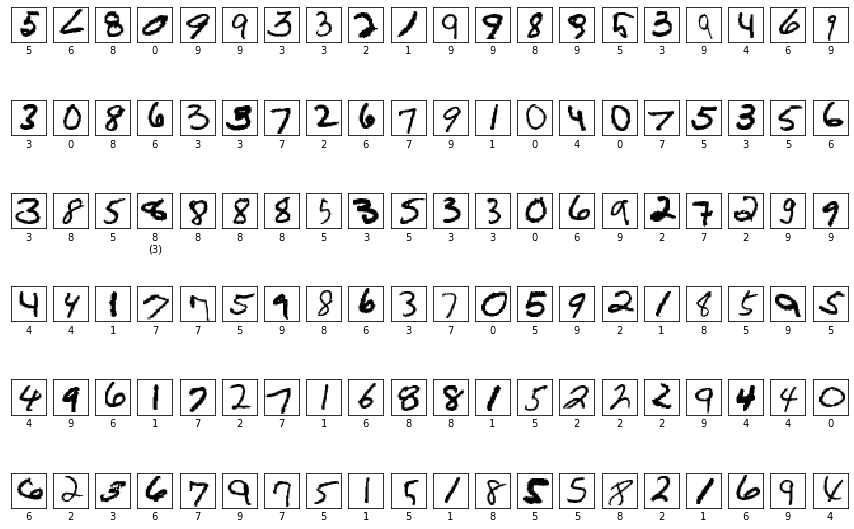

In [25]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = x_test[i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( test_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

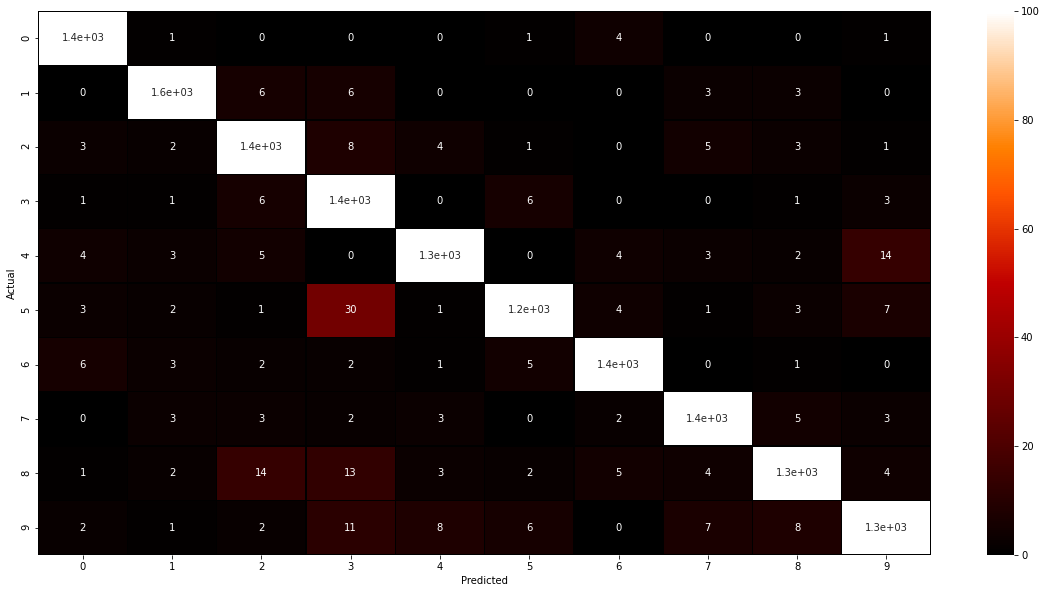

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=class_names, yticklabels=class_names, vmax=100, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1412
           1       0.99      0.99      0.99      1587
           2       0.97      0.98      0.98      1379
           3       0.95      0.99      0.97      1433
           4       0.99      0.97      0.98      1353
           5       0.98      0.96      0.97      1241
           6       0.99      0.99      0.99      1404
           7       0.98      0.99      0.98      1441
           8       0.98      0.97      0.97      1384
           9       0.98      0.97      0.97      1366

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



**TODO #3 - Create Lists of Good and Bad Predictions**

In [ ]:
bad = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] != y_test[i]]
good = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] == y_test[i]]
print(len(good))
print(len(bad))

13709
291


[20 18 39 72 20 21 19 23 26 33]


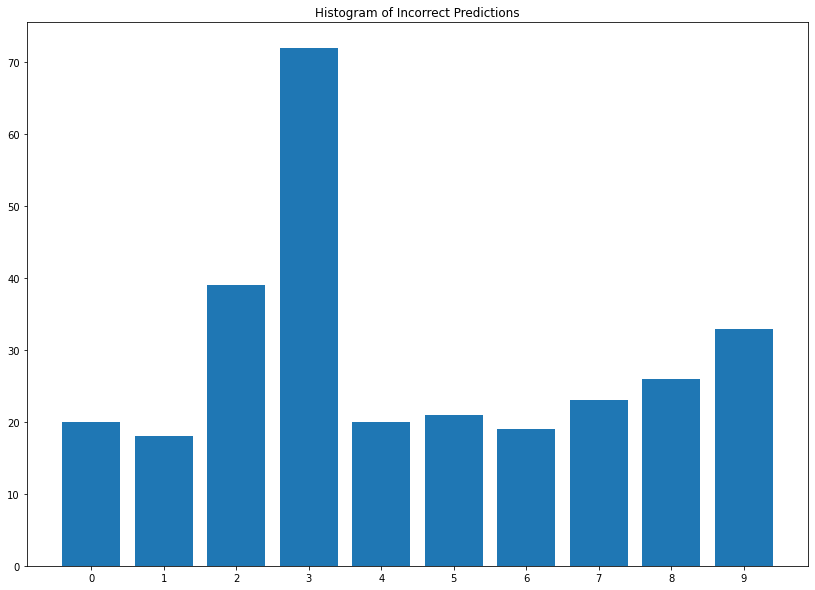

In [ ]:
h_bad = np.histogram( bad, len(class_names) )[0]
print( h_bad )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[1405 1569 1352 1415 1318 1189 1384 1420 1336 1321]


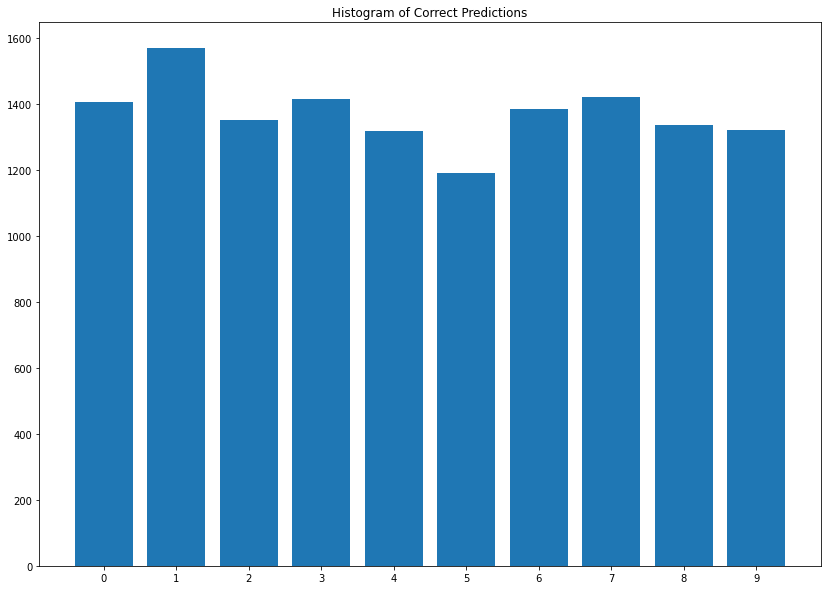

In [ ]:
h_good = np.histogram( good, len(class_names) )[0]
print( h_good )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

[1.4035087719298245, 1.1342155009451795, 2.803738317757009, 4.84196368527236, 1.4947683109118086, 1.7355371900826446, 1.35424091233072, 1.593901593901594, 1.908957415565345, 2.4372230428360413]


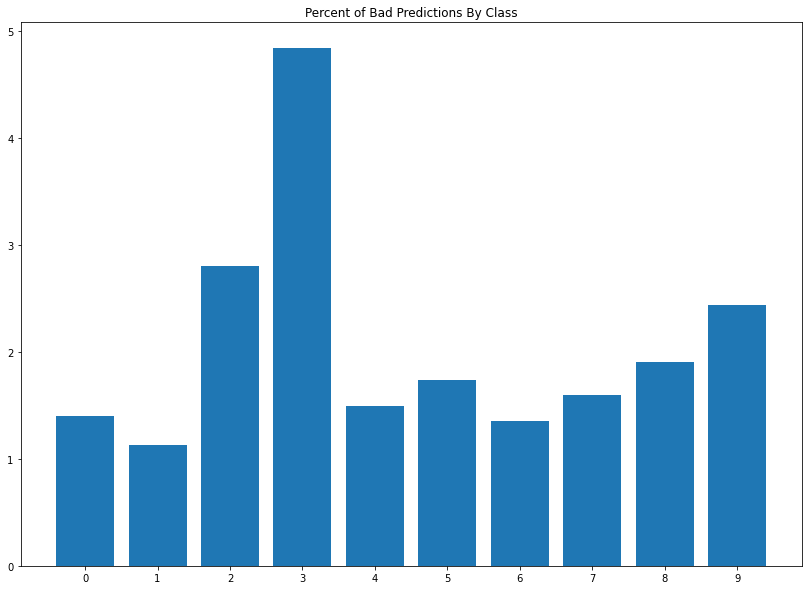

In [ ]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
print(pct_bad)
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

# Increase Noise

**TODO #4 - Create Noisy Test Data**

---

Create noisy test data. Noise is added 20 times iteratively, resulting in 21 sets of test data with increasing amounts of noise.  These sets will be represented as noise levels 0-20 with noise level 0 being the original noiseless test data.  

In [ ]:
np.random.seed(17)

zeroes = np.zeros((len(x_test), img_rows, img_cols, 1))
ones = zeroes + 1

noisy_test_sets = list()
noisy_display_sets = list()

#Base noiseless data
noisy_test_sets.append(x_test)
noisy_x_test = x_test

for i in range(0, 20):

  noise = np.random.normal(0, .1, x_test.shape)
  noisy_x_test = noisy_x_test + noise
  noisy_x_test = np.minimum(noisy_x_test, ones)
  noisy_x_test = np.maximum(noisy_x_test, zeroes)

  noisy_test_sets.append(noisy_x_test)
  # Reshape and multiply by 255 to get images for display
  noisy_display_sets.append(noisy_x_test.reshape(len(x_test), img_rows, img_cols) * 255)



**Test Noisy Data Against Shallow Model**

In [ ]:
noise_accuracy_scores = list()
noisy_predictions = list()
noise_classification_data = list()

for test_set in noisy_test_sets:
  pred = np.argmax(model.predict(test_set), axis=-1)
  noise_accuracy_scores.append(accuracy_score(y_test, pred))
  noise_classification_data.append(classification_report(y_test, pred))
  noisy_predictions.append(pred)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(noise_accuracy_scores)

[0.9792142857142857, 0.9590714285714286, 0.8883571428571428, 0.7803571428571429, 0.6749285714285714, 0.5954285714285714, 0.5317142857142857, 0.48164285714285715, 0.441, 0.4102857142857143, 0.37992857142857145, 0.3545714285714286, 0.33485714285714285, 0.31414285714285717, 0.29728571428571426, 0.2817142857142857, 0.26635714285714285, 0.25507142857142856, 0.23842857142857143, 0.2257142857142857, 0.21485714285714286]


**Display Noisy Images at the Noise Level 5**

---

Most of the images, even the ones that failed classification, are easily visible.  Despite this, the classification accuracy is 66%

first 120 test images (errors in parens)


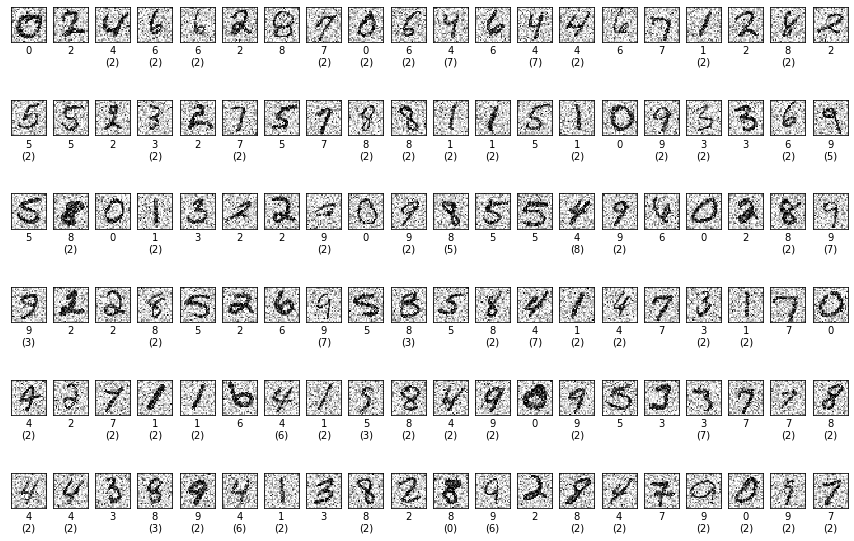

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_test_sets[9][i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_display_sets[9][i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

**Display Noisy Images at the Maximum Noise Level**

---

Many of the images are completely illegible

first 120 test images (errors in parens)


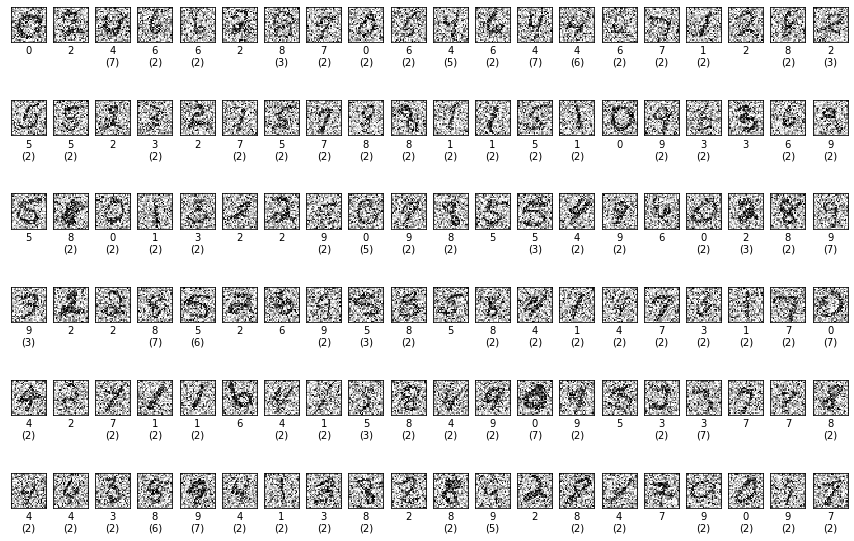

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_test_sets[20][i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_display_sets[19][i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

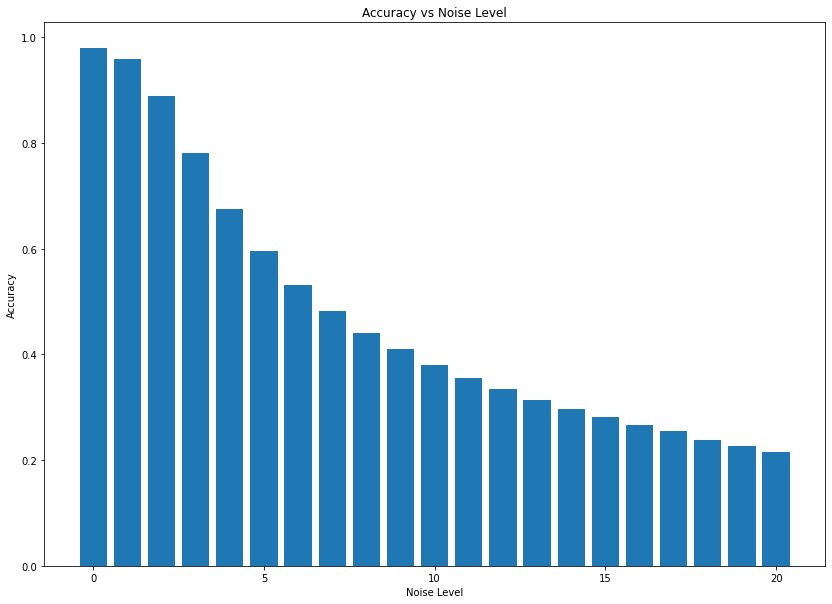

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()

# Increase Depth of Neural Network

---

Problem #5 in the assignment

In [ ]:
deep_model = keras.Sequential()
deep_model.add( keras.layers.Flatten( input_shape=input_shape) )
deep_model.add( keras.layers.Dense( 128, activation='relu') )
deep_model.add( keras.layers.Dense( 64, activation='relu') )
deep_model.add( keras.layers.Dense( 32, activation='relu') )
deep_model.add( keras.layers.Dense( len(class_names), activation='softmax' ) )
deep_model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

In [ ]:
ep = 100
start_2 = time()
h = deep_model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback], validation_data=(x_test, y_test))  #randomizes by default
elapsed_training_time_deep = time() - start_2

Epoch 1/100
1750/1750 [==============================] - 5s 3ms/step - loss: 0.4800 - accuracy: 0.8576 - val_loss: 0.1340 - val_accuracy: 0.9599
Epoch 2/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1130 - accuracy: 0.9664 - val_loss: 0.0965 - val_accuracy: 0.9708
Epoch 3/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0719 - accuracy: 0.9777 - val_loss: 0.0984 - val_accuracy: 0.9702
Epoch 4/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0577 - accuracy: 0.9821 - val_loss: 0.0911 - val_accuracy: 0.9738
Epoch 5/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 0.0925 - val_accuracy: 0.9750
Epoch 6/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0361 - accuracy: 0.9879 - val_loss: 0.0915 - val_accuracy: 0.9742
Epoch 7/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0303 - accuracy: 0.9895 - val_loss: 0.0889 - val_ac

In [ ]:
model.save('digits_deep.h5')

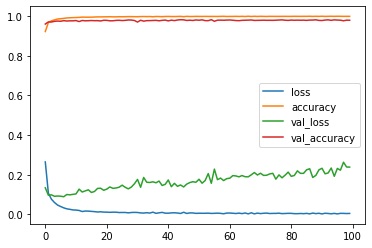

In [ ]:
pd.DataFrame(deep_model.history.history).plot()

In [ ]:
print(elapsed_training_time_deep)

405.50360918045044


In [ ]:
noise_accuracy_scores_deep = list()
noisy_predictions_deep = list()
noisy_classification_data_deep = list()

for test_set in noisy_test_sets:
  pred = np.argmax(deep_model.predict(test_set), axis=-1)
  noise_accuracy_scores_deep.append(accuracy_score(y_test, pred))
  noisy_classification_data_deep.append(classification_report(y_test, pred))
  noisy_predictions_deep.append(pred)

In [ ]:
print(noisy_classification_data_deep[0])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1412
           1       0.99      0.99      0.99      1587
           2       0.98      0.97      0.98      1379
           3       0.96      0.98      0.97      1433
           4       0.98      0.98      0.98      1353
           5       0.97      0.96      0.97      1241
           6       0.99      0.99      0.99      1404
           7       0.99      0.98      0.99      1441
           8       0.96      0.97      0.97      1384
           9       0.97      0.97      0.97      1366

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [ ]:
print(noise_accuracy_scores_deep)

[0.9791428571428571, 0.969, 0.9327142857142857, 0.8688571428571429, 0.7955714285714286, 0.7349285714285714, 0.6787857142857143, 0.6257857142857143, 0.5793571428571429, 0.5377857142857143, 0.49835714285714283, 0.46664285714285714, 0.4375, 0.4135714285714286, 0.3932857142857143, 0.3732857142857143, 0.3505714285714286, 0.333, 0.31921428571428573, 0.30507142857142855, 0.292]


**Histograms For Good and Bad Predictions of Noisless Test Data**

In [ ]:
bad = [noisy_predictions_deep[0][i] for i in range(len(noisy_predictions_deep[0])) if noisy_predictions_deep[0][i] != y_test[i]]
good = [noisy_predictions_deep[0][i] for i in range(len(noisy_predictions_deep[0])) if noisy_predictions_deep[0][i] == y_test[i]]
print(len(good))
print(len(bad))

13708
292


[19 11 29 56 25 35 16 15 50 36]


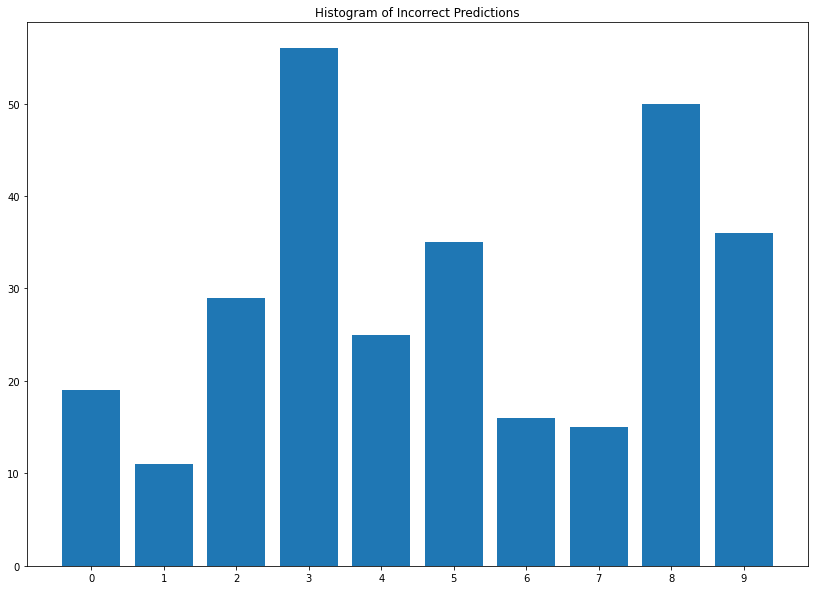

In [ ]:
h_bad = np.histogram( bad, len(class_names) )[0]
print( h_bad )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[1396 1570 1343 1408 1327 1196 1384 1416 1347 1321]


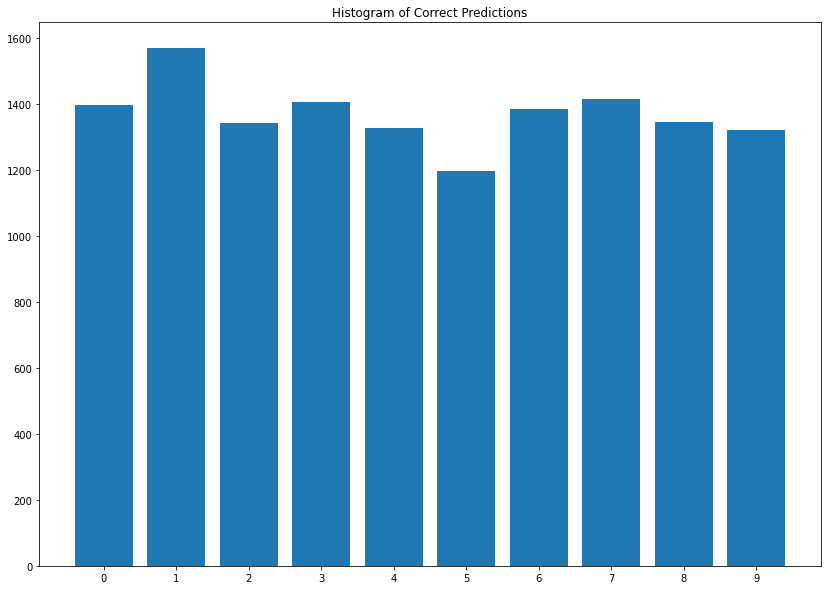

In [ ]:
h_good = np.histogram( good, len(class_names) )[0]
print( h_good )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

[1.342756183745583, 0.6957621758380772, 2.1137026239067054, 3.8251366120218577, 1.849112426035503, 2.843216896831844, 1.1428571428571428, 1.0482180293501049, 3.5790980672870436, 2.6529108327192334]


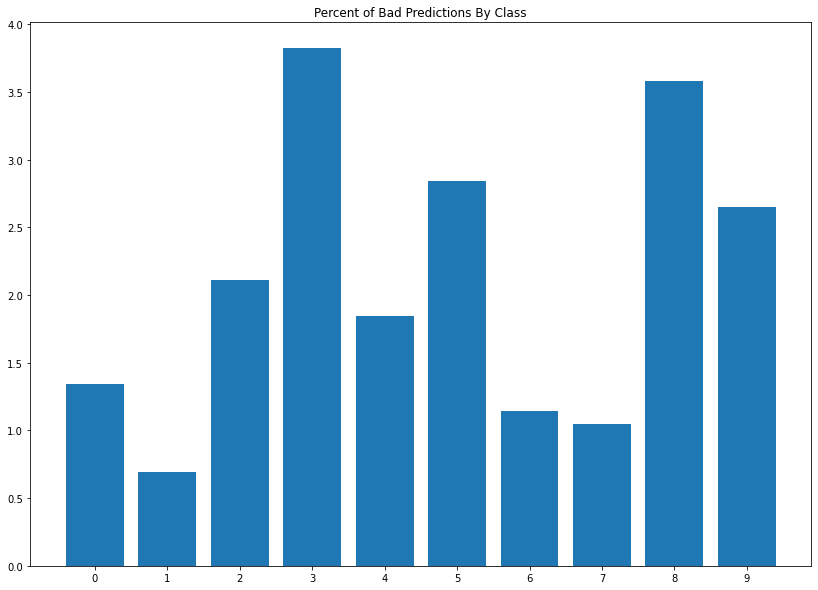

In [ ]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
print(pct_bad)
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

**Plot Accuracy Vs Noise Level**

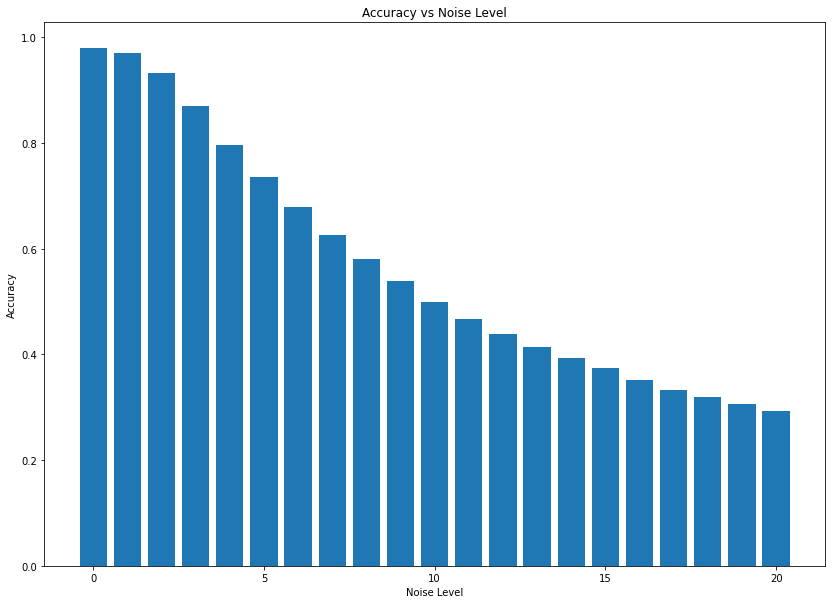

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores_deep )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()

**Comparing First Model With Deep Model**

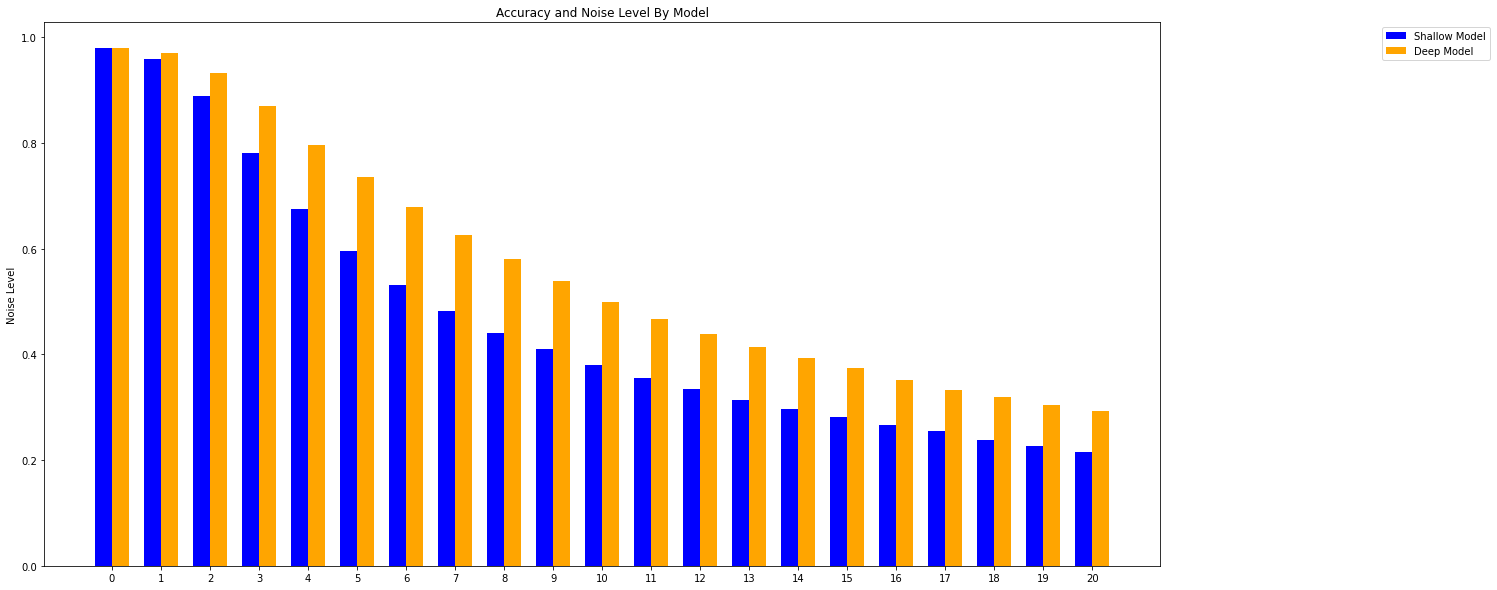

In [ ]:
labels = np.arange(0, 21)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, noise_accuracy_scores, width, label='Shallow Model', color='blue')
rects2 = ax.bar(x + width/2, noise_accuracy_scores_deep, width, label='Deep Model', color='orange')

ax.set_ylabel('Accuracy')
ax.set_ylabel('Noise Level')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')
plt.title('Accuracy and Noise Level By Model')
plt.show()